In [8]:
import pandas as pd

RF = pd.read_csv("RF_position.csv")

RF.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,175943,D. Mertens,31,Belgium,87,87,Napoli,€45M,€135K,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,€76.5M
2,218667,Bernardo Silva,23,Portugal,86,91,Manchester City,€59.5M,€180K,Left,...,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,€114.5M
3,202652,R. Sterling,23,England,86,89,Manchester City,€56.5M,€195K,Right,...,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,€108.8M
4,220834,Marco Asensio,22,Spain,85,92,Real Madrid,€54M,€215K,Left,...,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0,€121.5M
5,204485,R. Mahrez,27,Algeria,85,85,Manchester City,€40.5M,€205K,Left,...,86.0,45.0,31.0,18.0,15.0,9.0,13.0,11.0,6.0,€74.9M
6,184941,A. Sánchez,29,Chile,85,85,Manchester United,€37.5M,€215K,Right,...,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,€69.4M
7,193082,J. Cuadrado,30,Colombia,84,84,Juventus,€29.5M,€150K,Right,...,80.0,63.0,70.0,74.0,5.0,5.0,13.0,6.0,9.0,€48.7M
8,180403,Willian,29,Brazil,84,84,Chelsea,€30.5M,€175K,Right,...,79.0,43.0,57.0,51.0,14.0,12.0,13.0,7.0,13.0,€56.4M
9,231443,O. Dembélé,21,France,83,92,FC Barcelona,€40M,€155K,Left,...,75.0,42.0,30.0,33.0,6.0,6.0,14.0,10.0,13.0,€90M


In [9]:
RF = RF.drop(['Nationality','Overall','Club','International Reputation','Work Rate','Body Type',
                           'Jersey Number','Joined','Loaned From','Contract Valid Until','GKDiving','GKHandling','GKKicking',
                           'GKPositioning','GKReflexes','Release Clause','Positioning'], axis=1)


RF.head(10)


,ID,Name,Age,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Position,...,Strength,LongShots,Aggression,Interceptions,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,31,94,€110.5M,€565K,Left,4.0,4.0,RF,...,59.0,94.0,48.0,22.0,94.0,75.0,96.0,33.0,28.0,26.0
1,175943,D. Mertens,31,87,€45M,€135K,Right,4.0,4.0,RF,...,42.0,81.0,59.0,36.0,83.0,79.0,81.0,25.0,40.0,40.0
2,218667,Bernardo Silva,23,91,€59.5M,€180K,Left,3.0,4.0,RW,...,48.0,72.0,58.0,49.0,86.0,68.0,85.0,49.0,44.0,35.0
3,202652,R. Sterling,23,89,€56.5M,€195K,Right,3.0,4.0,RW,...,52.0,73.0,38.0,30.0,77.0,69.0,77.0,47.0,58.0,54.0
4,220834,Marco Asensio,22,92,€54M,€215K,Left,3.0,4.0,RW,...,61.0,88.0,45.0,45.0,84.0,62.0,83.0,40.0,42.0,39.0
5,204485,R. Mahrez,27,85,€40.5M,€205K,Left,4.0,5.0,RW,...,54.0,81.0,48.0,39.0,81.0,73.0,86.0,45.0,31.0,18.0
6,184941,A. Sánchez,29,85,€37.5M,€215K,Right,3.0,4.0,RW,...,72.0,81.0,79.0,46.0,82.0,77.0,84.0,38.0,44.0,35.0
7,193082,J. Cuadrado,30,84,€29.5M,€150K,Right,3.0,5.0,RAM,...,61.0,80.0,78.0,62.0,76.0,65.0,80.0,63.0,70.0,74.0
8,180403,Willian,29,84,€30.5M,€175K,Right,4.0,4.0,RW,...,60.0,81.0,44.0,55.0,83.0,70.0,79.0,43.0,57.0,51.0
9,231443,O. Dembélé,21,92,€40M,€155K,Left,5.0,4.0,RW,...,46.0,70.0,54.0,36.0,84.0,75.0,75.0,42.0,30.0,33.0


In [10]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
RF['Preferred Foot'] =label_encoder.fit_transform(RF['Preferred Foot'])
RF['Position'] =label_encoder.fit_transform(RF['Position'])

def convert_height_to_cm(height):
    try:
        feet, inches = map(int, height.split("'"))
        total_inches = feet * 12 + inches
        height_cm = total_inches * 2.54
        return round(height_cm, 2)
    except Exception as e:
        print(f"Error converting height: {e}")
        return None
    
def convert_weight_to_kg(weight):
    try:
        # Remove 'lbs' from the string and convert to float
        weight_kg = float(weight.replace('lbs', '').strip()) * 0.453592
        return round(weight_kg, 2)
    except Exception as e:
        print(f"Error converting weight: {e}")
        return None

# Applying the conversion functions
RF['Height'] = RF['Height'].apply(convert_height_to_cm)
RF['Weight'] = RF['Weight'].apply(convert_weight_to_kg)

# Function to convert Value and Wage
def convert_value_wage(value):
    if value[-1] == 'M':
        return float(value[1:-1]) * 1e6
    elif value[-1] == 'K':
        return float(value[1:-1]) * 1e3
    return float(value[1:])

# Apply conversion
RF['Value'] = RF['Value'].apply(convert_value_wage).astype(int)
RF['Wage'] = RF['Wage'].apply(convert_value_wage).astype(int)

RF.head(10)

,ID,Name,Age,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Position,...,Strength,LongShots,Aggression,Interceptions,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,31,94,110500000,565000,0,4.0,4.0,1,...,59.0,94.0,48.0,22.0,94.0,75.0,96.0,33.0,28.0,26.0
1,175943,D. Mertens,31,87,45000000,135000,1,4.0,4.0,1,...,42.0,81.0,59.0,36.0,83.0,79.0,81.0,25.0,40.0,40.0
2,218667,Bernardo Silva,23,91,59500000,180000,0,3.0,4.0,2,...,48.0,72.0,58.0,49.0,86.0,68.0,85.0,49.0,44.0,35.0
3,202652,R. Sterling,23,89,56500000,195000,1,3.0,4.0,2,...,52.0,73.0,38.0,30.0,77.0,69.0,77.0,47.0,58.0,54.0
4,220834,Marco Asensio,22,92,54000000,215000,0,3.0,4.0,2,...,61.0,88.0,45.0,45.0,84.0,62.0,83.0,40.0,42.0,39.0
5,204485,R. Mahrez,27,85,40500000,205000,0,4.0,5.0,2,...,54.0,81.0,48.0,39.0,81.0,73.0,86.0,45.0,31.0,18.0
6,184941,A. Sánchez,29,85,37500000,215000,1,3.0,4.0,2,...,72.0,81.0,79.0,46.0,82.0,77.0,84.0,38.0,44.0,35.0
7,193082,J. Cuadrado,30,84,29500000,150000,1,3.0,5.0,0,...,61.0,80.0,78.0,62.0,76.0,65.0,80.0,63.0,70.0,74.0
8,180403,Willian,29,84,30500000,175000,1,4.0,4.0,2,...,60.0,81.0,44.0,55.0,83.0,70.0,79.0,43.0,57.0,51.0
9,231443,O. Dembélé,21,92,40000000,155000,0,5.0,4.0,2,...,46.0,70.0,54.0,36.0,84.0,75.0,75.0,42.0,30.0,33.0


In [11]:
RF['Passing'] = RF['Crossing']  +RF['ShortPassing'] +RF['LongPassing']

RF['Ball_Control'] =  RF['Dribbling']  +RF['BallControl'] +RF['Composure'] +RF['HeadingAccuracy'] 

RF['Fitness'] = RF['Acceleration'] +RF['SprintSpeed'] +RF['Agility'] +RF['Reactions'] +RF['Balance'] +RF['Jumping'] +RF['Stamina'] +RF['Strength'] +RF['Aggression'] +RF['Vision']

RF['Defensive_abilities'] =RF['Interceptions'] +RF['Marking']  +RF['StandingTackle']  +RF['SlidingTackle'] 

RF['Shooting'] = RF['Curve'] +RF['FKAccuracy'] +RF['Finishing'] +RF['Penalties'] +RF['LongShots'] 

RF = RF [['Name','ID','Passing','Ball_Control','Value','Fitness','Defensive_abilities','Potential','Weight','Shooting','Age']]
RF.head(10)

,Name,ID,Passing,Ball_Control,Value,Fitness,Defensive_abilities,Potential,Weight,Shooting,Age
0,L. Messi,158023,261.0,359.0,110500000,799.0,109.0,94,72.12,451.0,31
1,D. Mertens,175943,233.0,296.0,45000000,771.0,141.0,87,60.78,407.0,31
2,Bernardo Silva,218667,249.0,319.0,59500000,738.0,177.0,91,63.96,365.0,23
3,R. Sterling,202652,230.0,290.0,56500000,762.0,189.0,89,68.95,352.0,23
4,Marco Asensio,220834,247.0,304.0,54000000,728.0,166.0,92,76.20,391.0,22
5,R. Mahrez,204485,239.0,315.0,40500000,749.0,133.0,85,67.13,396.0,27
6,A. Sánchez,184941,229.0,330.0,37500000,828.0,163.0,85,73.94,395.0,29
7,J. Cuadrado,193082,229.0,313.0,29500000,803.0,269.0,84,72.12,359.0,30
8,Willian,180403,233.0,282.0,30500000,740.0,206.0,84,78.02,393.0,29
9,O. Dembélé,231443,226.0,291.0,40000000,758.0,141.0,92,67.13,365.0,21


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from itertools import product
from sklearn.linear_model import Ridge

x = RF.drop(['Name','ID', 'Potential'], axis=1)
y = RF['Potential']

# Now split the cleaned data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [13]:
import CombinedModle

# Assuming your data is already loaded and split into x_train, y_train, x_test, y_test
Combine_test, Combine_train = CombinedModle.train_and_evaluate(x_train, y_train, x_test, y_test)

Combined R^2 Test: 0.8842239950297927
Combined R^2 Train: 0.9613428822813976


In [14]:
import PlayerPotential

# # Assuming you have CB, x_test, y_test, and Combine_test from the previous steps
top_players = PlayerPotential.get_top_players(RF, x_test, y_test, Combine_test)

# # Print the top 10 players
print(top_players)


            Name      ID  Actual_Potential  Predicted_Potential
0       L. Messi  158023                94            91.676294
3    R. Sterling  202652                89            89.404122
9     O. Dembélé  231443                92            87.941470
15        Malcom  222737                89            87.471329
5      R. Mahrez  204485                85            86.481053
25   David Neres  236632                86            84.929040
18      S. Verdi  196889                81            83.272295
39    M. Rashica  229167                83            83.023331
30    A. Januzaj  208330                84            81.796192
132    R. Nelson  231448                85            81.046628


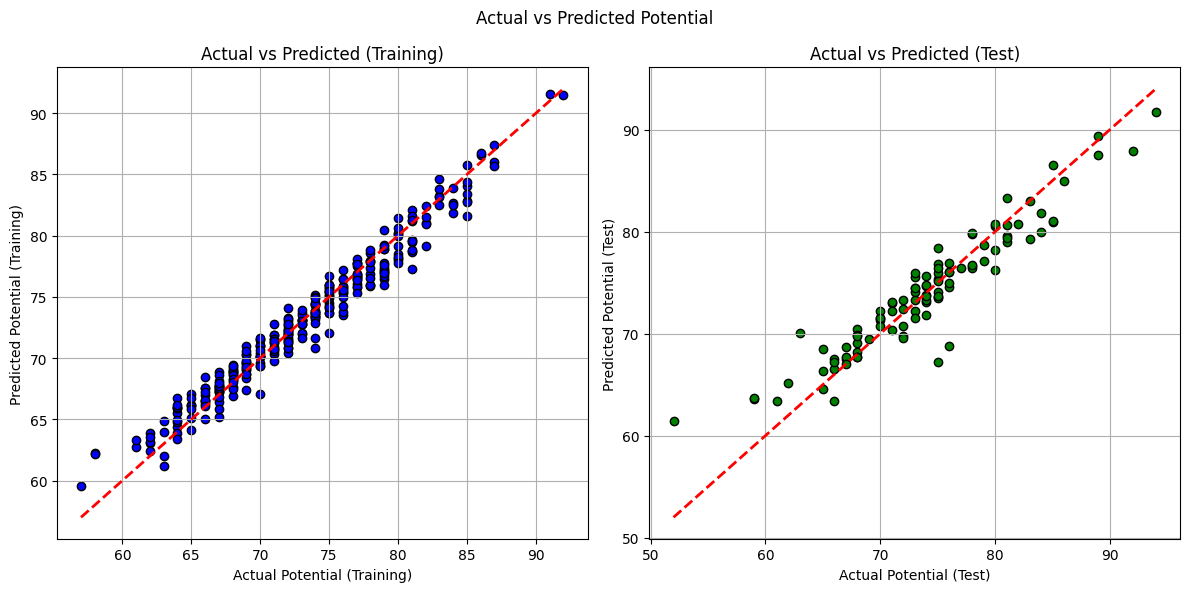

In [15]:
from plot_utils import Plot_actual_vs_predicted

Plot_actual_vs_predicted(y_train, y_test, Combine_train, Combine_test)